# SVM Tuning

In [1]:
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset, ClassifierTuning
from assignment_2.digits_classifiers.classifiers import SVMLinearClassifier, SVMPolynomialClassifier, SVMRBFKernelsClassifier
from assignment_2.digits_classifiers.io.read_datasets import read_datasets

Import dataset

In [2]:
data = read_datasets()

Reading datasets


In [3]:
X, y = data

NameError: name 'data' is not defined

Removing constant columns

In [4]:
always_zero = [c for c in list(X.columns) if sum(X.loc[:, c]) == 0]

In [5]:
X.drop(columns=always_zero, axis=1, inplace=True)

In [6]:
X, _, y, _ = train_test_split(X, y, test_size=0.95)

Splitting train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [8]:
X_train

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data = Dataset(x=X, y=y)
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

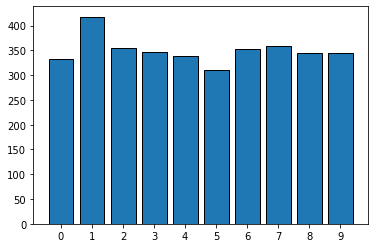

In [10]:
data.digit_distribution()

## Training SVM

### Linear SVM

In [11]:
linears = [
    SVMLinearClassifier(train=train, test=test, c=c)
    for c in [1, 2, 5, 10]
]

In [12]:
tuning_linears = ClassifierTuning(classifiers=linears, data=train, k=5)

In [ ]:
tuning_linears.evaluate_best_model()

2022-12-13 15:02:54.211 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:297 - Evaluating classifier: [LinearSVM: Train 2800, Test 700] - [C: 1]
2022-12-13 15:02:54.261 | INFO     | assignment_2.digits_classifiers.model:evaluate:243 -  > Processing fold 1


In [ ]:
tuning_linears.best_model

In [ ]:
tuning_linears.best_model.accuracy

In [ ]:
tuning_linears.best_model.confusion_matrix()

### Polinomial SVM

In [ ]:
polys = [
    SVMPolynomialClassifier(train=train, test=test, c=c, degree=2)
    for c in [1, 2, 5, 10]
]

In [ ]:
tuning_polys = ClassifierTuning(classifiers=polys, data=train, k=5)

In [ ]:
tuning_polys.evaluate_best_model()

In [ ]:
tuning_polys.best_model

In [ ]:
tuning_polys.best_model.accuracy

In [ ]:
tuning_polys.best_model.confusion_matrix()

### RBF Kernel Classifier

In [ ]:
rbfs = [
    SVMRBFKernelsClassifier(train=train, test=test, c=c)
    for c in [1, 2, 5, 10]
]

In [ ]:
tuning_rbfs = ClassifierTuning(classifiers=rbfs, data=train, k=5)

In [ ]:
tuning_rbfs.evaluate_best_model()

In [ ]:
tuning_rbfs.best_model

In [ ]:
tuning_rbfs.best_model.accuracy

In [ ]:
tuning_rbfs.best_model.confusion_matrix()